In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import adjustText
from adjustText import adjust_text

#Upload from CSVs
prof_adv_path = "prof_adv_2023_all.csv"
disct_attend_path = "District Proportional Attendance Rates.csv"
fr_rates_path = "FRLUNCH.csv"
fr_all_path = "FRALL.csv"
dist_count_path = "district_counties.csv"

#Read data and results
prof_adv_df = pd.read_csv(prof_adv_path)
fr_all_df = pd.read_csv(fr_all_path)
dist_count_df = pd.read_csv(dist_count_path)





## Filter Prof/Advanced

In [3]:
#Filter to only total scores
prof_adv_total_df = prof_adv_df.loc[(prof_adv_df["TYPE"]=="Total")]

#Filter to only math
prof_adv_math_df = prof_adv_total_df.loc[(prof_adv_total_df["CONTENT_AREA"]=="Mathematics")]

#Reduce
prof_adv_math_reduced_df = prof_adv_math_df[["DISTRICT_NAME", "PROFICIENT_PCT", "ADVANCED_PCT"]]

#Export to csv
prof_adv_math_reduced_df.to_csv('prof_adv_math.csv', index=False)

#Import edited csv - Narrowed down
prof_adv_math_updated_path = "prof_adv_math_filtered.csv"
prof_adv_math_new_df = pd.read_csv(prof_adv_math_updated_path)



In [4]:
prof_adv_math_reduced_df = prof_adv_math_reduced_df.rename(columns={"DISTRICT_NAME": "District Name"})
prof_adv_math_reduced_df.head()

,District Name,PROFICIENT_PCT,ADVANCED_PCT
17,ADAIR CO. R-I,16.1,12.5
61,KIRKSVILLE R-III,22.6,21.6
76,ADAIR CO. R-II,31.3,*
99,NORTH ANDREW CO. R-VI,32.5,29.9
119,AVENUE CITY R-IX,36.9,29.2


In [5]:
#Make Data Frame by county
prof_adv_fc_df = prof_adv_math_new_df.loc[(prof_adv_math_new_df["COUNTY"]=="Franklin County")]

prof_adv_jc_df = prof_adv_math_new_df.loc[(prof_adv_math_new_df["COUNTY"]=="Jefferson County")]

prof_adv_scc_df = prof_adv_math_new_df.loc[(prof_adv_math_new_df["COUNTY"]=="St. Charles County")]

prof_adv_wc_df = prof_adv_math_new_df.loc[(prof_adv_math_new_df["COUNTY"]=="West County")]

prof_adv_nc_df = prof_adv_math_new_df.loc[(prof_adv_math_new_df["COUNTY"]=="North County")]

prof_adv_sc_df = prof_adv_math_new_df.loc[(prof_adv_math_new_df["COUNTY"]=="South County")]



In [6]:
#Merge with FR Rates


In [7]:
fr_district_list = ["FRANKLIN CO. R-II", "MERAMEC VALLEY R-III", "NEW HAVEN", "ST. CLAIR R-XIII", "SULLIVAN",
    "UNION R-XI", "WASHINGTON", "CRYSTAL CITY 47", "DESOTO 73", "DUNKLIN R-V", "FESTUS R-VI", "FOX C-6",
    "GRANDVIEW R-II", "HILLSBORO R-III", "JEFFERSON CO. R-VII", "NORTHWEST R-I", "SUNRISE R-IX", "WINDSOR C-1",
    "FERGUSON-FLORISSANT R-II", "HANCOCK PLACE", "HAZELWOOD", "JENNINGS", "NORMANDY SCHOOLS COLLABORATIVE",
    "PATTONVILLE R-III", "RITENOUR", "RIVERVIEW GARDENS", "AFFTON 101", "BAYLESS", "MEHLVILLE R-IX", 
    "FRANCIS HOWELL R-III", "FT. ZUMWALT R-II", "ORCHARD FARM R-V", "ST. CHARLES R-VI", "WENTZVILLE R-IV",
    "ST. LOUIS CITY", "BRENTWOOD", "CLAYTON", "KIRKWOOD R-VII", "LADUE", "LINDBERGH SCHOOLS", 
    "MAPLEWOOD-RICHMOND HEIGHTS", "PARKWAY C-2", "ROCKWOOD R-VI", "UNIVERSITY CITY", "VALLEY PARK", "WEBSTER GROVES"]

fr_reduced_df = fr_all_df.loc[fr_all_df["District Name"].isin(fr_district_list)]



fr_reduced_df["January Membership"]=fr_reduced_df["January Membership"].str.replace(",","")
fr_reduced_df["January State FTE F&RL Count"]=fr_reduced_df["January State FTE F&RL Count"].str.replace(",", "")




            


/var/folders/x5/vxxw6g_96f337pf8r_zr_15h0000gn/T/ipykernel_10693/1086908881.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_reduced_df["January Membership"]=fr_reduced_df["January Membership"].str.replace(",","")
/var/folders/x5/vxxw6g_96f337pf8r_zr_15h0000gn/T/ipykernel_10693/1086908881.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_reduced_df["January State FTE F&RL Count"]=fr_reduced_df["January State FTE F&RL Count"].str.replace(",", "")


In [8]:
#Change Data Types
fr_reduced_df = fr_reduced_df.astype({"January Membership": "float64"})
fr_reduced_df = fr_reduced_df.astype({"January State FTE F&RL Count":"float64"})
fr_reduced_df.dtypes

District Code                                                   object
District Name                                                   object
BLDG. NO.                                                        int64
Building Name                                                   object
January State FTE F&RL Count                                   float64
January Membership                                             float64
2023 F&RL Percentage                                            object
Community Eligiblity Provision (CEP) Participating Building     object
Unnamed: 8                                                     float64
Unnamed: 9                                                     float64
Unnamed: 10                                                    float64
Unnamed: 11                                                    float64
Unnamed: 12                                                    float64
Unnamed: 13                                                    float64
Unname

In [9]:
#Group
grouped_fr_df = fr_reduced_df.groupby(["District Name"])
sums = grouped_fr_df["January State FTE F&RL Count"].sum()
totals = grouped_fr_df["January Membership"].sum()

averages = sums/totals*100

averages_df = pd.DataFrame(averages)
averages_df.head()

,0
District Name,
AFFTON 101,35.706281
BAYLESS,52.738695
BRENTWOOD,18.104536
CLAYTON,9.148206
CRYSTAL CITY 47,44.605703


In [10]:
# #fr_fc_school_list = []
# fr_fc_prct_list = []
# fr_fc_df = fr_all_df.loc[(fr_all_df["District Name"]=="MERAMEC VALLEY R-III")]
# fr_fc_school_list.append("MERAMEC VALLEY R-III")
# fr_fc_df = fr_fc_df.astype({"January Membership":"float"})
# fr_fc_df = fr_fc_df.astype({"January State FTE F&RL Count":"float"})

# fr_fc_count = fr_fc_df["January State FTE F&RL Count"].sum()
# fr_fc_all = fr_fc_df["January Membership"].sum().round(2)
# fr_fc_prct = fr_fc_count/fr_fc_all*100
# fr_fc_prct_1 = fr_fc_prct.round(2)





In [12]:
#Merge FR and ADv/PROF frames
merged_df = pd.merge(averages_df,prof_adv_math_reduced_df, how="inner", on=["District Name"] )

merged_df = merged_df.rename(columns={0:"FR_PCT"})
merged_df = merged_df.astype({"PROFICIENT_PCT": "float64"})
merged_df = merged_df.astype({"ADVANCED_PCT":"float64"})

total_pct = []
for index, row in merged_df.iterrows():
    total_pct.append((row["PROFICIENT_PCT"]+row["ADVANCED_PCT"]))
    
merged_df["TOTAL_PCT"] = total_pct
merged_df["FR_PCT"]=merged_df["FR_PCT"].round(1)

merged_df.to_csv("fr_district", index=False)
merged_df.head(50)

,District Name,FR_PCT,PROFICIENT_PCT,ADVANCED_PCT,TOTAL_PCT
0,AFFTON 101,35.7,21.2,12.5,33.7
1,BAYLESS,52.7,24.1,27.1,51.2
2,BRENTWOOD,18.1,20.2,42.3,62.5
3,CLAYTON,9.1,23.6,46.6,70.2
4,CRYSTAL CITY 47,44.6,23.6,21.1,44.7
5,DESOTO 73,41.5,29.9,24.7,54.6
6,DUNKLIN R-V,44.0,23.1,10.9,34.0
7,FERGUSON-FLORISSANT R-II,99.9,11.3,5.1,16.4
8,FESTUS R-VI,33.8,30.3,33.8,64.1
9,FOX C-6,27.5,27.3,21.8,49.1


In [11]:
#Add csv with districts and merge
dist_count_df = dist_count_df.rename(columns={"DISTRICT_NAME": "District Name"})

merged_df = pd.merge(merged_df, dist_count_df, how="inner", on=["District Name"])

merged_df.head(50)

,District Name,FR_PCT,PROFICIENT_PCT,ADVANCED_PCT,TOTAL_PCT,COUNTY
0,AFFTON 101,35.7,21.2,12.5,33.7,South County
1,BAYLESS,52.7,24.1,27.1,51.2,South County
2,BRENTWOOD,18.1,20.2,42.3,62.5,West County
3,CLAYTON,9.1,23.6,46.6,70.2,West County
4,CRYSTAL CITY 47,44.6,23.6,21.1,44.7,Jefferson County
5,DESOTO 73,41.5,29.9,24.7,54.6,Jefferson County
6,DUNKLIN R-V,44.0,23.1,10.9,34.0,Jefferson County
7,FERGUSON-FLORISSANT R-II,99.9,11.3,5.1,16.4,North County
8,FESTUS R-VI,33.8,30.3,33.8,64.1,Jefferson County
9,FOX C-6,27.5,27.3,21.8,49.1,Jefferson County


In [12]:
#reduce
merged_df = merged_df[["FR_PCT", "TOTAL_PCT", "COUNTY"]]
merged_df["COUNTY"].unique()

array(['South County', 'West County', 'Jefferson County', 'North County',
       'St. Charles County', 'Franklin County', 'St. Louis City'],
      dtype=object)

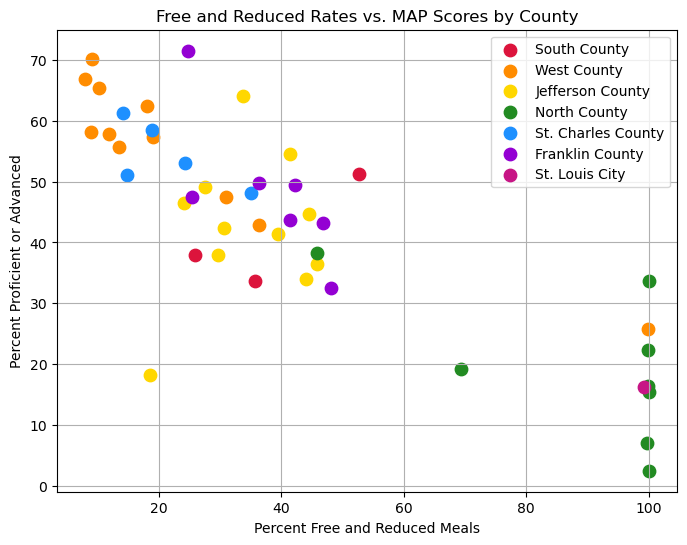

In [18]:
#colors for counties
county_colors = {'South County': "crimson", 'West County': "darkorange", 'Jefferson County': "gold", 'North County': "forestgreen",
       'St. Charles County': "dodgerblue", 'Franklin County': "darkviolet", 'St. Louis City': "mediumvioletred"}

plt.figure(figsize=(8, 6))

for county, color in county_colors.items():
    subset=merged_df[merged_df["COUNTY"]==county]
    plt.scatter(subset["FR_PCT"], subset["TOTAL_PCT"], c=color, label = county, s=80)
plt.xlabel("Percent Free and Reduced Meals")
plt.ylabel("Percent Proficient or Advanced")
plt.title("Free and Reduced Rates vs. MAP Scores by County")



plt.grid()
plt.legend()
# Save the plot as an image file
plt.savefig('CountiesVsFR.png')


plt.show()
    